# **Modelling and Evaluating**

## Objectives

- Answer business requirement 2:
    - The client is interested to tell wheterh a given leaf is covered with powdery mildew

## Inputs

- Image shape are located in a pickle file.
- Images from the test, train, validation folders and their subfolders.

## Outputs

- Image and label distribution plot:
    - Bar chart showing the number of images per label in the train, validation, and test sets.
    - Pie chart showing the percentage of images in each set.
- Image augmentation:
    -Plot showing a sample of augmented images for each set.
- Class indices:
    -A dictionary of class indices is to be used for prediction inference on the labels.
- Model creation and summary:
    - Creation of a machine learning model and display of its outline.
- Model training:
    - Train the model using the train set and validate on the validation set.
- Save model:
    - Save the trained model.
- Learning curve plot:
    - The plot of model performance on the train and validation set.
- Model evaluation:
    - Evaluate the model performance on the test set.
    - Calculate accuracy and plot the ROC curve.
    - Classification report:
        - For Model A: overall accuracy and per-class precision, recall, and F1 score.
        - For Model B: classification report with macro avg and weighted avg.
        - For Model C: synthetic classification report per label.
    - Plot confusion matrix.
    - Save evaluation results as a pickle file.
- Prediction on a random image file:
    - Predict the label of a random image file using the trained model.


---

### Import packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import tensorflow as tf
from matplotlib.image import imread
import joblib

---

### Set working directory

In [2]:
cwd = os.getcwd()

In [3]:
os.chdir('/workspace/mildew-detector')
print("You set a new current directory")

You set a new current directory


In [4]:
work_dir = os.getcwd()
work_dir

'/workspace/mildew-detector'

---

## Set input directories

Set train, validation and test paths

In [5]:
my_data_dir = os.path.abspath('inputs/cherryleaves_dataset/cherry-leaves')
train_path = os.path.join(my_data_dir, 'train') 
val_path = os.path.join(my_data_dir, 'validation')
test_path = os.path.join(my_data_dir, 'test')

## Set output directory

In [6]:
# Set output directory and version
version = 'v1'
file_path = os.path.abspath(f'outputs/{version}')

# Create output directory if not exists
if not os.path.exists(file_path):
    os.makedirs(file_path)
else:
    print(f'{version} already exists. Creating a new version.')

v1 already exists. Creating a new version.


## Set Label names

In [7]:
labels = os.listdir(train_path)
print('Label for the images are', labels)

Label for the images are ['healthy', 'powdery_mildew']


### Set image shape

In [8]:
with open(f"{file_path}/image_shape.pkl", 'rb') as f:
    image_shape = joblib.load(f)

    print('Labels for the images are,', image_shape)

Labels for the images are, (256, 256, 3)


---

### Images distribution

Count number of images per set and label

In [9]:
import os
import kaleido
import plotly.express as px
import plotly.io as pio

# Create a DataFrame to store the image distribution and count per set and label
df_freq = pd.DataFrame([])

# Iterate over the sets and labels and count the number of images
for folder in ['train', 'test', 'validation']:
    for label in labels:
        try:
            count = len(os.listdir(os.path.join(my_data_dir, folder, label)))
        except:
            count = None
        df_freq = df_freq.append(pd.Series({
            'Set': folder,
            'Label': label,
            'Count': count
        }), ignore_index=True)

# Print the image distribution and count per set and label
for folder in ['train', 'test', 'validation']:
    print(f"{folder.capitalize()} set:")
    print(df_freq[df_freq['Set']==folder].to_string(index=False, header=False, justify='center'))
    print("\n")


# Plot the image distribution and count per set and label using Plotly
import plotly.express as px
import plotly.io as pio

fig = px.sunburst(df_freq, path=['Set', 'Label'], values='Count')
fig.show()

# Save the image to the file path as a PNG with a width of 800 pixels and height of 600 pixels
pio.write_image(fig, f"{file_path}/img_distribution.png", width=800, height=600, format='png')


Train set:
 1472.0         healthy  train
 1472.0  powdery_mildew  train


Test set:
 422.0         healthy  test
 422.0  powdery_mildew  test


Validation set:
 210.0         healthy  validation
 210.0  powdery_mildew  validation




---

## Image data augmentation

Import necessary libraries.

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

- Define the image data generator with augmentation techniques.

In [13]:
train_datagen = ImageDataGenerator(rotation_range=20,
                                   width_shift_range=0.10,
                                   height_shift_range=0.10,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest',
                                   rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

- Setting batch size, color mode, and class mode for image data generator.

In [14]:
batch_size = 32
color_mode = 'rgb'
class_mode = 'binary'

#### Plot augmented training image set.

Using the Keras flow_from_directory() function, the image data in the train_path and val_path directories are read and transformed utilising the train_datagen and val_datagen ImageDataGenerator objects, respectively. The resulting training and validation sets are generated with a batch size of 32, image dimensions of (256, 256), and RGB colour mode. The class mode is set to binary since there are only two classes. The shuffle parameter is set to True for the training set and False for the validation set. The seed parameter is set to 42 for reproducibility. The resulting settings are stored in train_set and val_set variables, and the class indices are printed using the train_set.class_indices attribute.

In [15]:
train_set = train_datagen.flow_from_directory(train_path,
                                              target_size=image_shape[:2],
                                              color_mode=color_mode,
                                              batch_size=batch_size,
                                              class_mode=class_mode,
                                              shuffle=True,
                                              seed=42)
val_set = val_datagen.flow_from_directory(val_path,
                                           target_size=image_shape[:2],
                                           color_mode=color_mode,
                                           batch_size=batch_size,
                                           class_mode=class_mode,
                                           shuffle=False)
test_set = ImageDataGenerator(rescale=1./255).flow_from_directory(test_path,
                                                                  target_size=image_shape[:2],
                                                                  color_mode=color_mode,
                                                                  batch_size=batch_size,
                                                                  class_mode=class_mode,
                                                                  shuffle=False
                                                                  )



# Print class indices
print(f"Class indices: {train_set.class_indices}")

Found 2944 images belonging to 2 classes.
Found 420 images belonging to 2 classes.
Found 844 images belonging to 2 classes.
Class indices: {'healthy': 0, 'powdery_mildew': 1}


(32, 256, 256, 3)


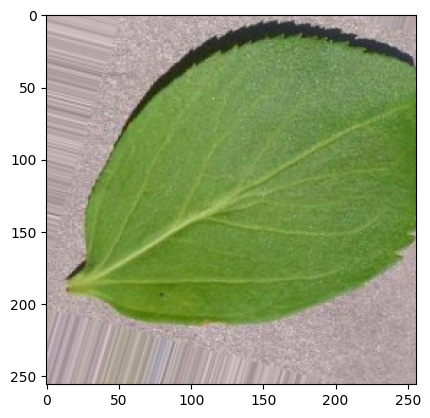

(32, 256, 256, 3)


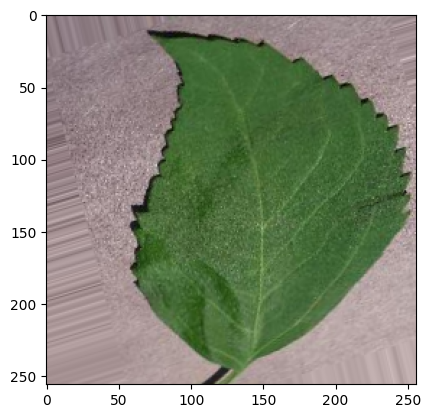

(32, 256, 256, 3)


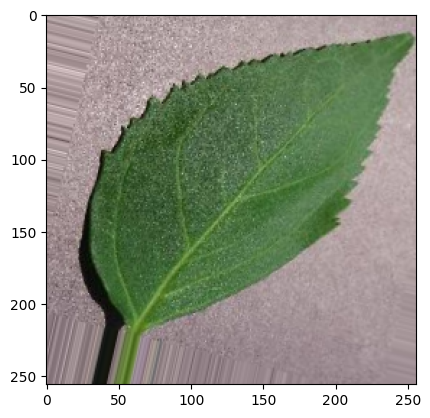

In [16]:
for _ in range(3):
    img, label = train_set.next()
    print(img.shape)
    plt.imshow(img[0])
    plt.show()

(32, 256, 256, 3)


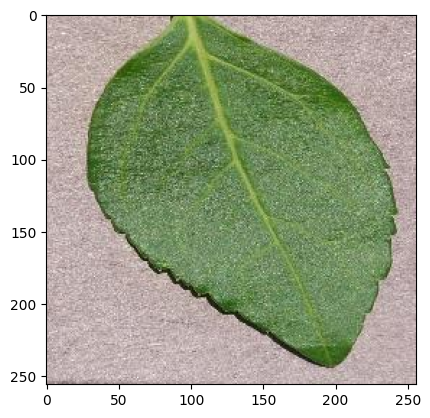

(32, 256, 256, 3)


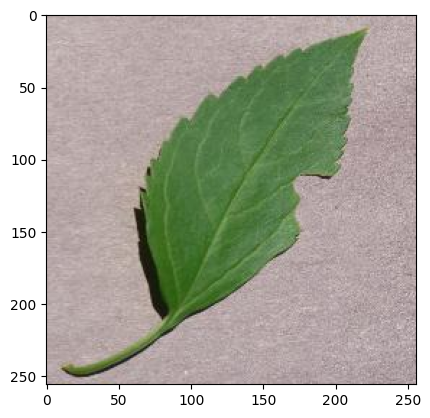

(32, 256, 256, 3)


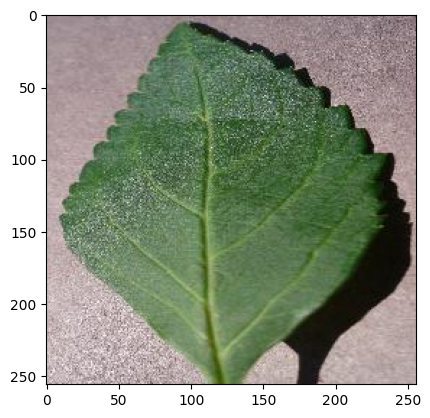

In [17]:
for _ in range(3):
    img, label = val_set.next()
    print(img.shape)  # (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

(32, 256, 256, 3)


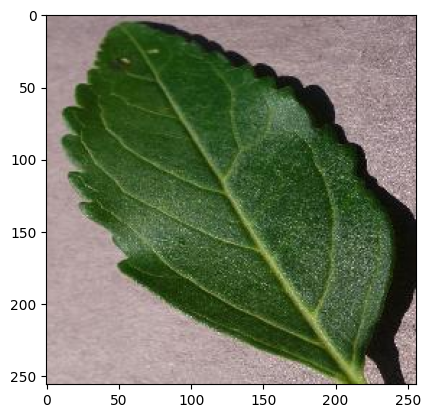

(32, 256, 256, 3)


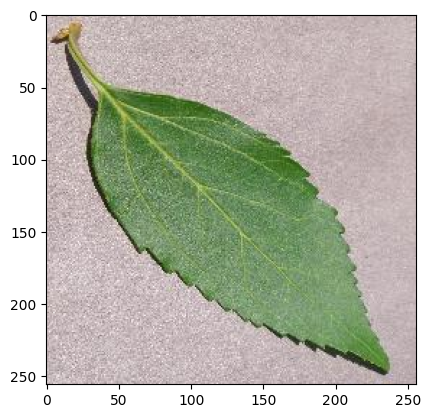

(32, 256, 256, 3)


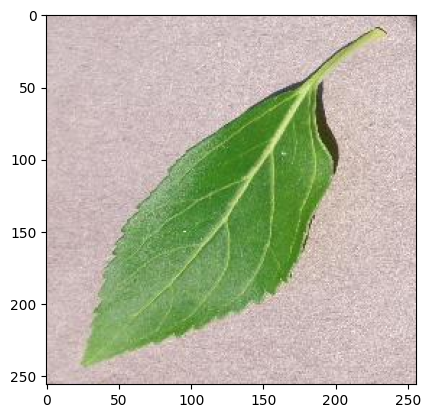

In [18]:
for _ in range(3):
    img, label = test_set.next()
    print(img.shape)  # (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

In [19]:
joblib.dump(value=train_set.class_indices,
            filename=f"{file_path}/class_indices.pkl")

['/workspace/mildew-detector/outputs/v1/class_indices.pkl']

---

## Model Creation

The modelused is the Convolutional Neural Network (CNN) which will learn from the dorminant feature (the powdery mildew) of the pre-labeled cherry leaf image.

#### Machine Learning Model

Import packages

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [20]:
# Define a Sequential model
model = Sequential()

# Add a convolutional layer with 32 filters, a kernel size of 3x3, and 'relu' activation function
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
# Add a max pooling layer with a pool size of 2x2
model.add(MaxPooling2D(pool_size=(2,2)))
# Add another convolutional layer with 64 filters, a kernel size of 3x3, and 'relu' activation function
model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
# Add another max pooling layer with a pool size of 2x2
model.add(MaxPooling2D(pool_size=(2,2)))
# Add a third convolutional layer with 64 filters, a kernel size of 3x3, and 'relu' activation function
model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
# Add another max pooling layer with a pool size of 2x2
model.add(MaxPooling2D(pool_size=(2,2)))
# Flatten the output from the convolutional layers
model.add(Flatten())
# Add a dense layer with 128 units and 'relu' activation function
model.add(Dense(units=128, activation='relu'))
# Add a dropout layer with a rate of 0.5
model.add(Dropout(0.5))
# Add a dense output layer with 1 unit and 'sigmoid' activation function
model.add(Dense(units=1, activation='sigmoid'))


2023-05-04 16:34:29.594320: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Compile the model
- Compile the model with the Adam optimizer, binary crossentropy loss function, and accuracy metric.


In [21]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Define callbacks

In [22]:
# Import the necessary callback classes from Keras
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Define the EarlyStopping callback to monitor validation loss, stop after 10 epochs with no improvement, and restore the weights of the best model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True)
# Define the ReduceLROnPlateau callback to reduce the learning rate by a factor of 0.2 after 5 epochs with no improvement
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1, mode='min')
# Define the ModelCheckpoint callback to save the best model based on validation accuracy to a file
checkpoint = ModelCheckpoint(filepath=os.path.join(file_path, 'mildew_detector_model.h5'),
                             monitor='val_accuracy',
                             save_best_only=True,
                             mode='max',
                             verbose=1)

- Train the model on the training set, validate on the validation set, use the defined callbacks, and run for 50 epochs.

In [24]:
history = model.fit(train_set,
                    validation_data=val_set,
                    epochs=50,
                    callbacks=[early_stopping, reduce_lr, checkpoint])


Epoch 1/50
92/92 [==============================] - 167s 2s/step - loss: 0.4403 - accuracy: 0.7976 - val_loss: 0.3846 - val_accuracy: 0.7881

Epoch 00001: val_accuracy improved from -inf to 0.78810, saving model to /workspace/mildew-detector/outputs/v1/mildew_detector_model.h5
Epoch 2/50
92/92 [==============================] - 188s 2s/step - loss: 0.1240 - accuracy: 0.9616 - val_loss: 0.0408 - val_accuracy: 0.9857

Epoch 00002: val_accuracy improved from 0.78810 to 0.98571, saving model to /workspace/mildew-detector/outputs/v1/mildew_detector_model.h5
Epoch 3/50
92/92 [==============================] - 179s 2s/step - loss: 0.0509 - accuracy: 0.9888 - val_loss: 0.0144 - val_accuracy: 0.9952

Epoch 00003: val_accuracy improved from 0.98571 to 0.99524, saving model to /workspace/mildew-detector/outputs/v1/mildew_detector_model.h5
Epoch 4/50
92/92 [==============================] - 167s 2s/step - loss: 0.0372 - accuracy: 0.9895 - val_loss: 0.0155 - val_accuracy: 0.9929

Epoch 00004: val_a

In [25]:
# Evaluate the model on the test set and print the test loss and accuracy.
test_loss, test_acc = model.evaluate(test_set)

print(f"Test loss: {test_loss:.2f}")
print(f"Test accuracy: {test_acc:.2%}")

27/27 [==============================] - 10s 376ms/step - loss: 9.0056e-04 - accuracy: 1.0000
Test loss: 0.00
Test accuracy: 100.00%


### Plot the training and validation loss and accuracy.

- Model preform.

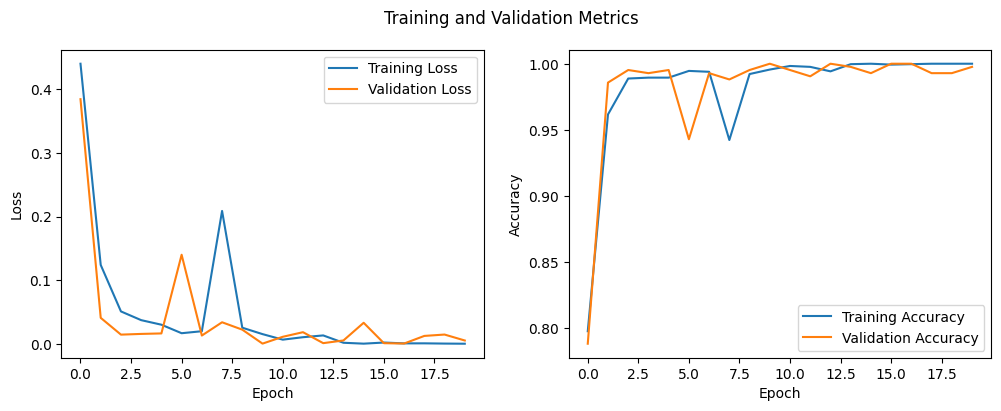

In [27]:
# Create a plot of the training and validation metrics
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle('Training and Validation Metrics')

# Plot the training and validation loss
axs[0].plot(history.history['loss'], label='Training Loss')
axs[0].plot(history.history['val_loss'], label='Validation Loss')
axs[0].legend()
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')

# Plot the training and validation accuracy
axs[1].plot(history.history['accuracy'], label='Training Accuracy')
axs[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[1].legend()
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')

# Save the plot to a file
plt.savefig(os.path.join(file_path, 'training_and_validation_metrics.png'))

# Display the plot
plt.show()

Save the model architecture

In [28]:
# Save the model architecture to a JSON file
with open(os.path.join(file_path, 'model_architecture.json'), 'w') as f:
    f.write(model.to_json())

Evaulation

In [10]:
# Import the load_model function from Keras models module
from keras.models import load_model
# Load the pre-trained model from the file path specified by file_path/mildew_detector_model.h5
model = load_model(f'{file_path}/mildew_detector_model.h5')

2023-05-05 20:11:30.301101: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


The evaluation result is a tuple containing the test loss and accuracy.
The test loss is a scalar value that represents how well the model is doing on unseen data.
The test accuracy is a scalar value that represents the percentage of correctly classified images in the test set.

In [20]:
# Evaluate the trained model on the test set
evaluation = model.evaluate(test_set)

2023-05-05 20:12:33.899488: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


27/27 [==============================] - 10s 377ms/step - loss: 9.0056e-04 - accuracy: 1.0000


Save the evaluation in a pk1 file.

In [21]:
joblib.dump(value=evaluation, filename=f'{file_path}/evaluation.pk1')

['/workspace/mildew-detector/outputs/v1/evaluation.pk1']

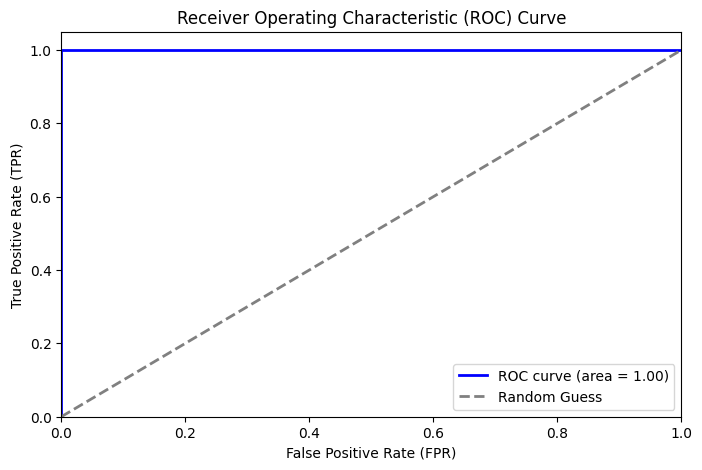

In [25]:
from sklearn.metrics import roc_curve, auc

# Make predictions on the test set
pred = model.predict(test_set)

# Calculate FPR, TPR, and classification thresholds
fpr, tpr, thresholds = roc_curve(test_set.classes, pred)

# Calculate area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='blue', lw=2,
         label=f'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='grey', lw=2,
         linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.savefig(f'{file_path}/roc_curve.png', bbox_inches='tight', dpi=150)

## Confusion matrix

### A classification report and a confusion matrix

                precision    recall  f1-score   support

       Healthy       1.00      1.00      1.00       422
Powdery Mildew       1.00      1.00      1.00       422

      accuracy                           1.00       844
     macro avg       1.00      1.00      1.00       844
  weighted avg       1.00      1.00      1.00       844



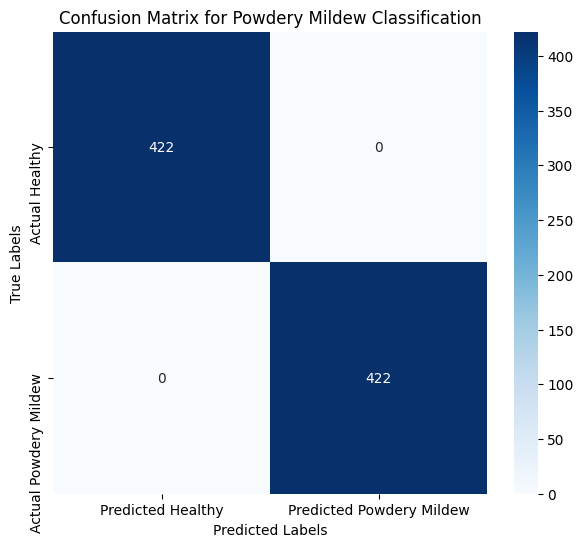

In [33]:
from sklearn.metrics import confusion_matrix, classification_report
# Round the predictions and convert them to integers
y_pred = np.round(pred).astype(int)

target_names = ['Healthy', 'Powdery Mildew']

# Calculate confusion matrix and classification report
confusion_mat = confusion_matrix(test_set.classes, y_pred)
clf_report = classification_report(test_set.classes, y_pred, target_names=target_names)

# Plot the confusion matrix using a heatmap
fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(confusion_mat, annot=True, fmt='g', cmap='Blues',
            xticklabels=['Predicted Healthy', 'Predicted Powdery Mildew'],
            yticklabels=['Actual Healthy', 'Actual Powdery Mildew'],
            ax=ax)
ax.set_title('Confusion Matrix for Powdery Mildew Classification')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
plt.savefig(f'{file_path}/confusion_matrix.png', bbox_inches='tight', dpi=150)

# Print classification report
print(clf_report)

## Classification Report Plot

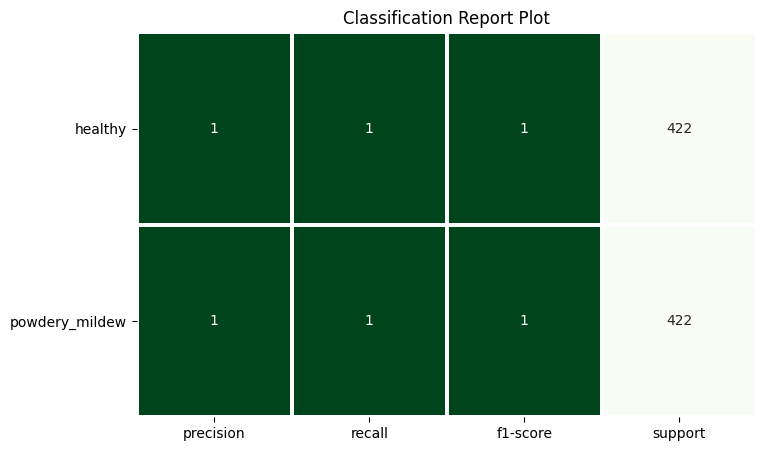

In [32]:
import matplotlib as mpl

clf_report = classification_report(
    test_set.classes, y_pred, target_names=labels, output_dict=True)

# Convert dictionary to pandas DataFrame and sort by support column
df = pd.DataFrame(clf_report).T
keys_to_remove = {'accuracy', 'macro avg', 'weighted avg'}
df = df.drop(keys_to_remove)
df = df.sort_index(ascending=True)

# Define color map and normalization for heatmap
cmap = 'Greens'
norm = mpl.colors.Normalize(vmin=df['support'].min(), vmax=df['support'].sum())

# Create heatmap with masked support column
fig, ax = plt.subplots(figsize=(8, 5))
mask = np.zeros(df.shape, dtype=bool)
mask[:, -1] = True
sns.heatmap(df, mask=mask, annot=True, cmap=cmap, fmt='.3g',
            cbar=False, linewidths=.4, linecolor='white', vmin=0.0, vmax=1.0)

# Create heatmap with support column normalized colors
mask = np.zeros(df.shape, dtype=bool)
mask[:, :-1] = True
sns.heatmap(df, mask=mask, annot=True, cmap=cmap, fmt='.3g', cbar=False,
            linewidths=2, linecolor='white', vmin=df['support'].min(),
            vmax=df['support'].sum(), norm=norm)

# Set plot title and y-axis labels
plt.title('Classification Report Plot')
if labels is not None:
    classes = labels
else:
    classes = [str(i) for i in range(len(df.index))]
plt.yticks(np.arange(len(classes))+.5, classes, rotation=0)

# Save plot to file
plt.savefig(f'{file_path}/classification_report.png',
            bbox_inches='tight', dpi=150)


---

Predict on new data

Convert image to array for prediction

In [33]:
my_image = image.img_to_array(pil_image) # Convert PIL image to numpy array
my_image = np.expand_dims(my_image, axis=0)/255 # Add an extra dimension to the array and normalize the pixel values
print(my_image.shape) # Print the shape of the image array

(1, 256, 256, 3)


Predict class probabilities

In [34]:
# Get the prediction probability for the image
prediction_probability = model.predict(my_image)[0,0]

# Map the predicted class index to the corresponding label
target_map = {v: k for k, v in train_set.class_indices.items()}
predicted_class =  target_map[prediction_probability > 0.5]  

# If the predicted class is not the first class, invert the prediction probability
if predicted_class == target_map[0]: prediction_probability = 1 - prediction_probability

# Print the prediction probability and predicted class
print(f'Prediction probability: {prediction_probability}')
print(f'Predicted class: {predicted_class}')

Prediction probability: 0.9999998807907104
Predicted class: powdery_mildew


---

### Push files to repo

- .gitignore

In [43]:
!cat .gitignore

core.Microsoft*
core.mongo*
core.python*
env.py
__pycache__/
*.py[cod]
node_modules/
.github/
cloudinary_python.txt
kaggle.json

- git status

In [44]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   jupyter_notebooks/ModellingEvaluating.ipynb
	modified:   outputs/v1/evaluation.pk1
	modified:   outputs/v1/mildew_detector_model.h5
	modified:   outputs/v1/model_architecture.json

no changes added to commit (use "git add" and/or "git commit -a")


- git add

In [45]:
!git add .

- git commit

In [46]:
!git commit

hint: Waiting for your editor to close the file... 

- git push

In [ ]:
!git push

Enumerating objects: 7, done.
Counting objects: 100% (7/7), done.
Delta compression using up to 16 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 56.69 KiB | 691.00 KiB/s, done.
Total 4 (delta 3), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To https://github.com/CBergane/mildew-detector.git
   81ee502..62b4fe1  main -> main
